# importする

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
!ls

300features_40minwords_10context
Mercari_Price_Suggestion_Challenge.ipynb
_finish
one_word
sample_submission.csv
sample_submission_stg2.csv
submit_rf_base.csv
test.tsv
test_stg2.tsv
train.tsv


In [153]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission_stg2 = pd.read_csv('sample_submission_stg2.csv')
train = pd.read_csv('train.tsv', delimiter='\t' )
test = pd.read_csv('test.tsv', delimiter='\t' )
test_stg2 = pd.read_csv('test_stg2.tsv', delimiter='\t' )

In [154]:
sample_submission.shape, train.shape, test.shape

((693359, 2), (1482535, 8), (693359, 7))

In [155]:
sample_submission.head()

,test_id,price
0,0,26.738
1,1,26.738
2,2,26.738
3,3,26.738
4,4,26.738


## まず中身を眺める

In [156]:
train.head(20)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...


## infoをみる

In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [158]:
train.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
dtype: bool

## 欠損だけ処理する

In [159]:
def fill_missing_data(data):
    data.category_name.fillna(value = "Other/Other/Other", inplace = True)
    data.brand_name.fillna(value = "Unknown", inplace = True)
    data.item_description.fillna(value = "No description yet", inplace = True)
    return data

train = fill_missing_data(train)

## Numerical Featureだけ、中身をチェックする

In [160]:
train.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [161]:
train.head(20)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Unknown,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Unknown,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,Unknown,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,Unknown,8.0,0,I realized his pants are on backwards after th...


# EDA

## 価格分布で整理

In [162]:
train.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

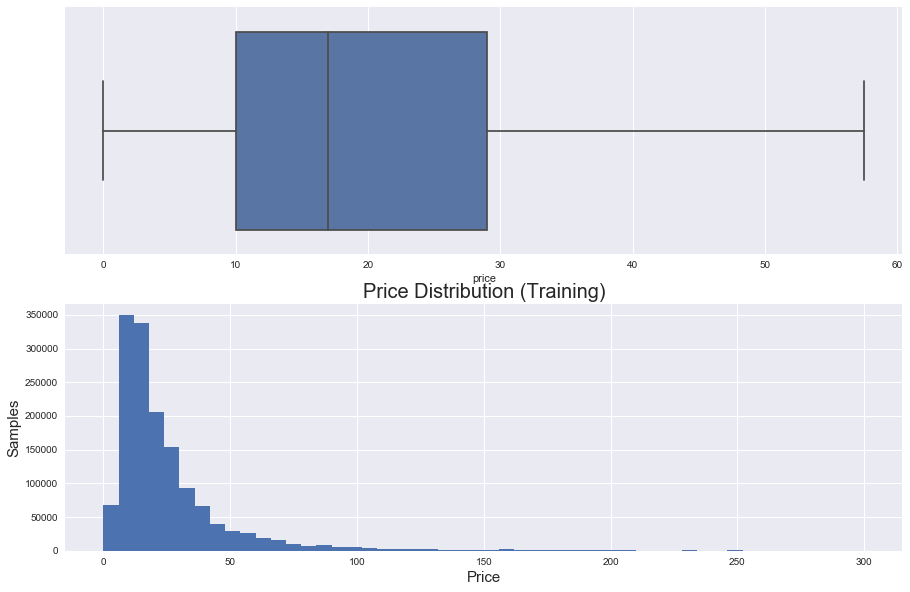

In [163]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.boxplot(train.price, showfliers = False, ax = ax[0])
ax[1].hist(train.price, bins = 50, range = [0, 300], label = "price")
ax[1].set_title("Price Distribution (Training)", fontsize = 20)
ax[1].set_xlabel("Price", fontsize = 15)
ax[1].set_ylabel("Samples", fontsize = 15)
plt.show()

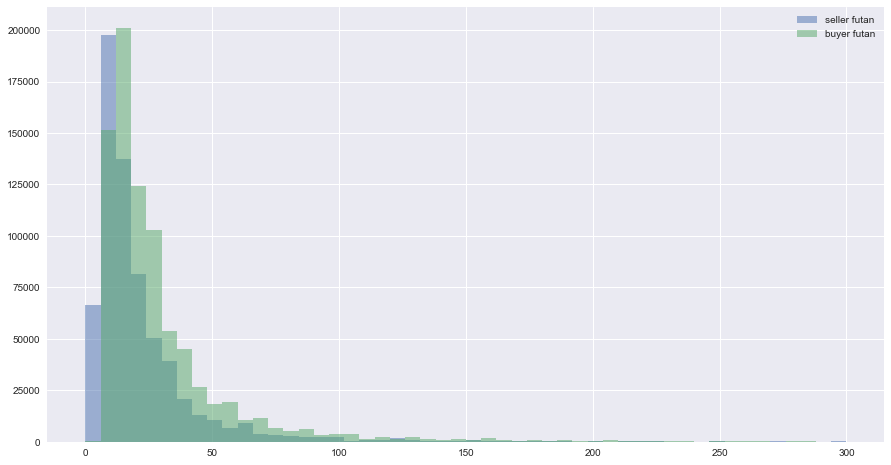

In [164]:
plt.figure(figsize = (15, 8))
plt.hist(train[train.shipping == 1].price, bins = 50, range = [0, 300], alpha = 0.5, label = "seller futan")
plt.hist(train[train.shipping == 0].price, bins = 50, range = [0, 300], alpha = 0.5, label = "buyer futan")
plt.legend(fontsize = 10)
plt.show()

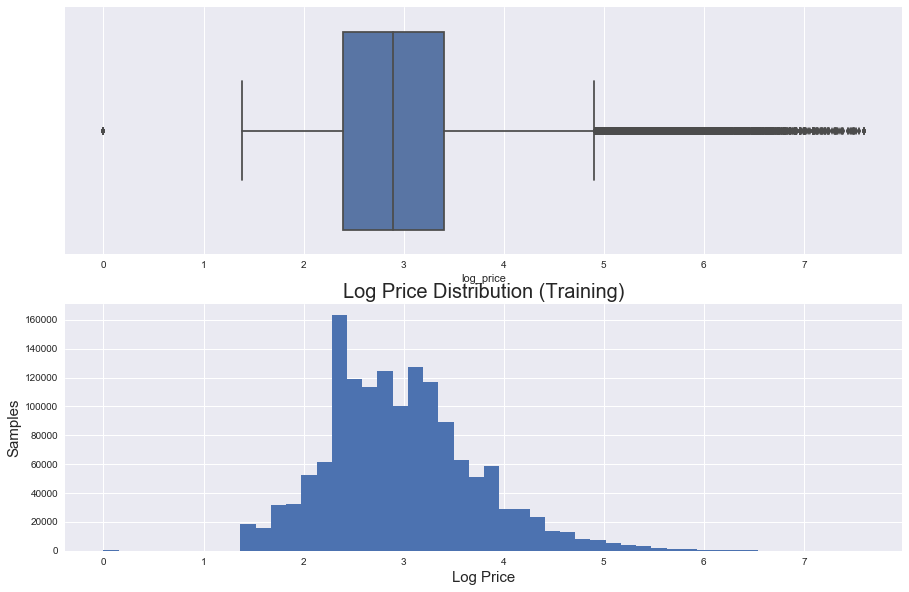

In [165]:
train["log_price"] = np.log(train["price"] + 1)
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.boxplot(train.log_price, ax = ax[0])
ax[1].hist(train.log_price, bins = 50)
ax[1].set_title("Log Price Distribution (Training)", fontsize = 20)
ax[1].set_xlabel("Log Price", fontsize = 15)
ax[1].set_ylabel("Samples", fontsize = 15)
plt.show()

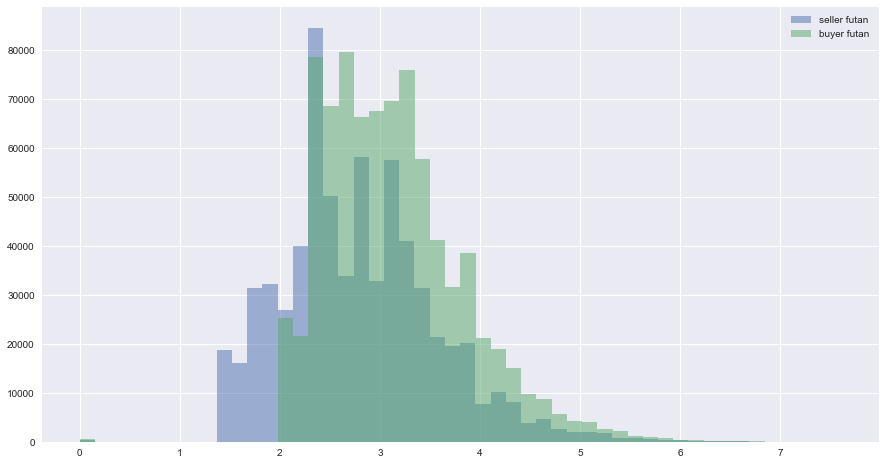

In [166]:
plt.figure(figsize = (15, 8))
plt.hist(train[train.shipping == 1].log_price, bins = 50, alpha = 0.5, label = "seller futan")
plt.hist(train[train.shipping == 0].log_price, bins = 50, alpha = 0.5, label = "buyer futan")
plt.legend(fontsize = 10)
plt.show()

In [167]:
## 0円の出品の数

train[train["price"] == 0].price.size

874

## Brand視点で整理

In [168]:
## ブランドの数

train["brand_name"].value_counts().size

4810

## とりあえずTop10 Brand

In [19]:
brands=train["brand_name"].value_counts()

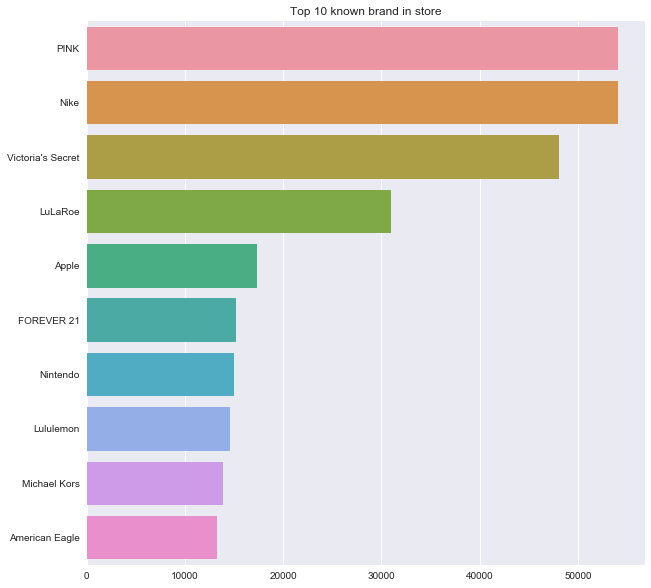

In [20]:
plt.figure(figsize = (10, 10))
sns.barplot(brands[1:11].values, brands[1:11].index)
plt.title("Top 10 known brand in store")
plt.show()

## ブランド別平均単価

In [21]:
brand_mean_price = train.groupby(["brand_name"], as_index = True).price.mean().sort_values(ascending = False)
print("mean price by brands", brand_mean_price[:10])

mean price by brands brand_name
Demdaco             429.000000
Proenza Schouler    413.250000
Auto Meter          344.000000
Oris                300.000000
MCM Worldwide       289.173913
Longines            254.000000
Vitamix             253.111111
Blendtec            251.800000
David Yurman        248.611570
Celine              238.780822
Name: price, dtype: float64


## ブランド別単価の標準偏差

In [22]:
brand_std_price = train.groupby(["brand_name"], as_index = True).price.std().sort_values(ascending = False)
print("std price by brands", brand_std_price[:10])

std price by brands brand_name
Demdaco               592.555483
Proenza Schouler      420.369183
MCM Worldwide         351.470773
Saint Laurent         339.769830
Celine                339.356795
Louis Vuitton         247.801644
Goyard                242.051339
Sanyo                 226.328216
MICHELE               224.704134
Valentino Garavani    222.253909
Name: price, dtype: float64


## ブランド別単価の中央値

In [23]:
brand_median_price = train.groupby(["brand_name"]).price.median().sort_values(ascending = False)
print("median price by brands", brand_median_price[:10])

median price by brands brand_name
Demdaco                429.0
Auto Meter             344.0
Proenza Schouler       315.5
Oris                   300.0
Longines               254.0
Blendtec               250.0
Dainese                230.0
Frédérique Constant    224.0
David Yurman           220.0
Vitamix                205.0
Name: price, dtype: float64


## unknownの記述統計量

In [24]:
train[train["brand_name"] == "Unknown"].price.describe()

count    632682.000000
mean         21.133453
std          27.361260
min           0.000000
25%           9.000000
50%          14.000000
75%          24.000000
max        2000.000000
Name: price, dtype: float64

## PINKの記述統計量

In [25]:
train[train["brand_name"] == "PINK"].price.describe()

count    54088.000000
mean        26.341314
std         23.633983
min          0.000000
25%         14.000000
50%         20.000000
75%         31.000000
max        798.000000
Name: price, dtype: float64

## Nikeの記述統計量

In [26]:
train[train["brand_name"] == "Nike"].price.describe()

count    54043.000000
mean        30.760265
std         26.336649
min          0.000000
25%         14.000000
50%         22.000000
75%         38.000000
max        459.000000
Name: price, dtype: float64

## Victoria's Secretの記述統計量

In [27]:
train[train["brand_name"] == "Victoria's Secret"].price.describe()

count    48036.000000
mean        23.214287
std         21.079616
min          0.000000
25%         13.000000
50%         19.000000
75%         27.000000
max       1400.000000
Name: price, dtype: float64

## LuLaRoeの記述統計量

In [28]:
train[train["brand_name"] == "LuLaRoe"].price.describe()

count    31024.000000
mean        33.667967
std         19.721633
min          0.000000
25%         21.000000
50%         29.000000
75%         40.000000
max        350.000000
Name: price, dtype: float64

## Appleの記述統計量

In [29]:
train[train["brand_name"] == "Apple"].price.describe()

count    17322.000000
mean        73.268618
std        119.862148
min          0.000000
25%         11.000000
50%         22.000000
75%         85.000000
max       1909.000000
Name: price, dtype: float64

In [30]:
free_item = train[train.price == 0].brand_name
print(free_item.unique().size, "brands have free items")

237 brands have free items


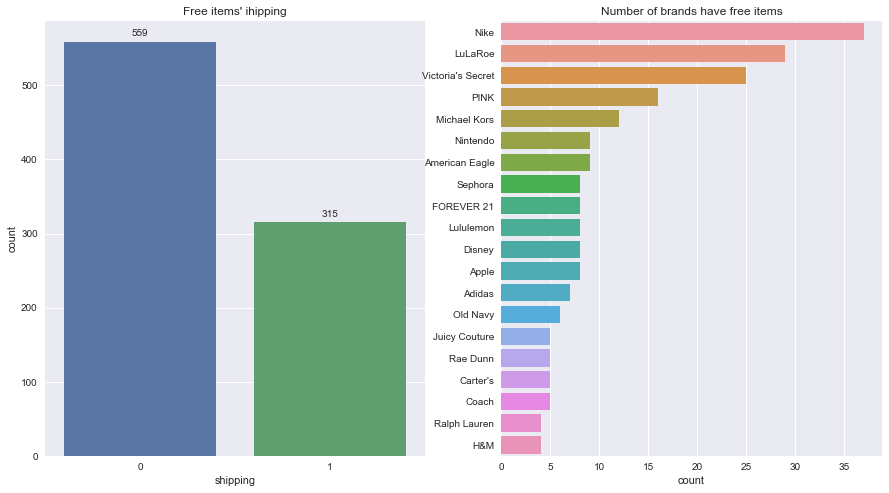

In [31]:
known_free_item = free_item.value_counts()[1:21]
fig, ax = plt.subplots(1, 2, figsize = (15, 8))
sns.countplot(train[train.price == 0].shipping, ax = ax[0])
rects = ax[0].patches
labels = train[train.price == 0].shipping.value_counts().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = "center", va = "bottom")
ax[0].set_title("Free items' ihipping")
sns.barplot(known_free_item.values, known_free_item.index, ax = ax[1])
ax[1].set_xlabel("count")
ax[1].set_title("Number of brands have free items")
plt.show()

## Categoryで

In [32]:
train["main_cat"] = train.category_name.str.extract("([^/]+)/[^/]+/[^/]+")
train["subcat1"] = train.category_name.str.extract("[^/]+/([^/]+)/[^/]+")
train["subcat2"] = train.category_name.str.extract("[^/]+/[^/]+/([^/]+)")

/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


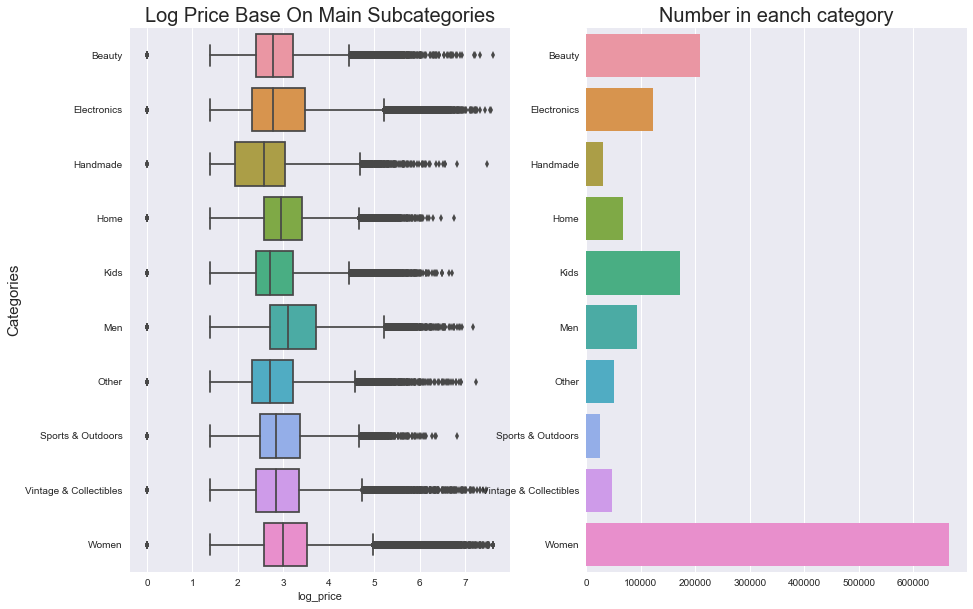

In [33]:
category = train.main_cat
order = sorted(category.unique())
fig, ax = plt.subplots(1, 2, figsize = (15, 10))
sns.boxplot(x = train.log_price, y = category, orient = "h", order = order, ax = ax[0])
ax[0].set_title("Log Price Base On Main Subcategories", fontsize = 20)
ax[0].set_ylabel("Categories", fontsize = 15)
sns.barplot(category.value_counts().values, category.value_counts().index, order = order, ax = ax[1])
ax[1].set_title("Number in eanch category", fontsize = 20)
plt.show()

## TfidfVectorizerで

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import string 

def compute_tfidf(description):
    description = str(description)
    description.translate(string.punctuation)

    tfidf_sum = 0
    words_count = 0
    for w in description.lower().split():
        words_count += 1
        if w in tfidf_dict:
            tfidf_sum += tfidf_dict[w]
    
    if words_count > 0:
        return tfidf_sum/words_count
    else:
        return 0
    

In [35]:
tfidf = TfidfVectorizer(
    min_df = 5, strip_accents = "unicode", lowercase = True,
    analyzer = "word", token_pattern = r"\w+", ngram_range =(1, 3), use_idf = True, 
    smooth_idf = True, sublinear_tf = True, stop_words = "english")

tfidf.fit_transform(train["item_description"].apply(str))
tfidf_dict = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
train["desc_tfidf"] = train["item_description"].apply(compute_tfidf)

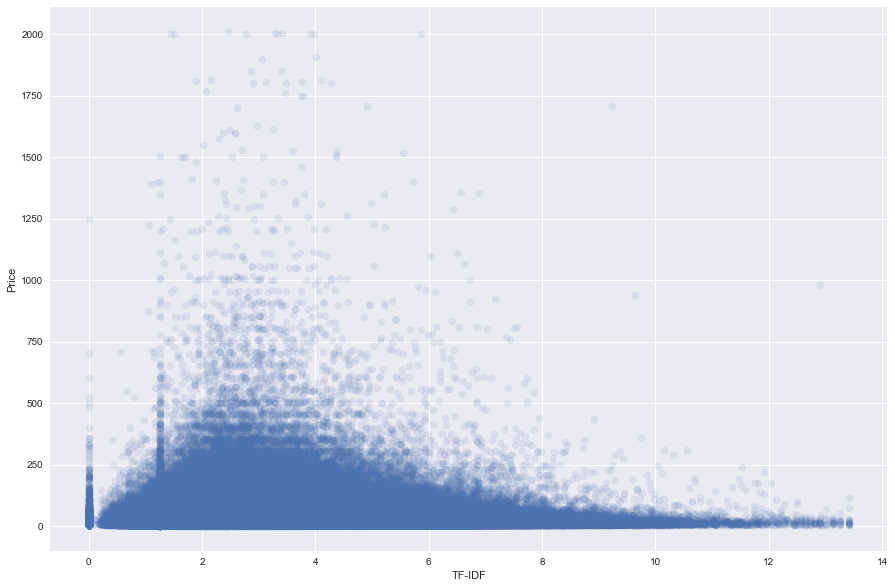

In [40]:
plt.figure(figsize = (15, 10))
plt.scatter(x = train.desc_tfidf, y = train.price, alpha = 0.1)
plt.xlabel("TF-IDF")
plt.ylabel("Price")
plt.show()

# trainのデータでFeature　Engineeringする

In [38]:
train=train.drop("log_price", axis=1)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 12 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1482535 non-null object
brand_name           1482535 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482535 non-null object
main_cat             1482535 non-null object
subcat1              1482535 non-null object
subcat2              1482535 non-null object
desc_tfidf           1482535 non-null float64
dtypes: float64(2), int64(3), object(7)
memory usage: 135.7+ MB


In [41]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat1,subcat2,desc_tfidf
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Unknown,10.0,1,No description yet,Men,Tops,T-shirts,1.260701
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,2.359801
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,1.965394
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,1.732991
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Unknown,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,4.639038


## ３Category（main_cat, subcat1, subcat2）に、mean, std, min, maxを追加する

In [42]:
mean_grouped=train.groupby(['main_cat', 'subcat1', 'subcat2']).mean().price

In [43]:
std_grouped=train.groupby(['main_cat', 'subcat1', 'subcat2']).std().price

In [47]:
min_grouped=train.groupby(['main_cat', 'subcat1', 'subcat2']).min().price

In [48]:
max_grouped=train.groupby(['main_cat', 'subcat1', 'subcat2']).max().price

In [50]:
mean_grouped = pd.DataFrame(mean_grouped)
mean_grouped = mean_grouped.rename(columns={'price': 'cate_price_mean'})
mean_grouped = mean_grouped.reset_index()
mean_grouped.head()

,main_cat,subcat1,subcat2,cate_price_mean
0,Beauty,Bath & Body,Bath,18.481878
1,Beauty,Bath & Body,Bathing Accessories,21.882530
2,Beauty,Bath & Body,Cleansers,13.564315
3,Beauty,Bath & Body,Other,20.469388
4,Beauty,Bath & Body,Scrubs & Body Treatments,24.640394


In [51]:
std_grouped = pd.DataFrame(std_grouped)
std_grouped = std_grouped.rename(columns={'price': 'cate_price_std'})
std_grouped = std_grouped.reset_index()
std_grouped.head()

,main_cat,subcat1,subcat2,cate_price_std
0,Beauty,Bath & Body,Bath,18.189663
1,Beauty,Bath & Body,Bathing Accessories,12.634822
2,Beauty,Bath & Body,Cleansers,13.369652
3,Beauty,Bath & Body,Other,19.923933
4,Beauty,Bath & Body,Scrubs & Body Treatments,21.703671


In [52]:
min_grouped = pd.DataFrame(min_grouped)
min_grouped = min_grouped.rename(columns={'price': 'cate_price_min'})
min_grouped = min_grouped.reset_index()
min_grouped.head()

,main_cat,subcat1,subcat2,cate_price_min
0,Beauty,Bath & Body,Bath,0.0
1,Beauty,Bath & Body,Bathing Accessories,3.0
2,Beauty,Bath & Body,Cleansers,3.0
3,Beauty,Bath & Body,Other,3.0
4,Beauty,Bath & Body,Scrubs & Body Treatments,3.0


In [53]:
max_grouped = pd.DataFrame(max_grouped)
max_grouped = max_grouped.rename(columns={'price': 'cate_price_max'})
max_grouped = max_grouped.reset_index()
max_grouped.head()

,main_cat,subcat1,subcat2,cate_price_max
0,Beauty,Bath & Body,Bath,565.0
1,Beauty,Bath & Body,Bathing Accessories,75.0
2,Beauty,Bath & Body,Cleansers,209.0
3,Beauty,Bath & Body,Other,168.0
4,Beauty,Bath & Body,Scrubs & Body Treatments,200.0


In [54]:
train=pd.merge(train, mean_grouped, on=['main_cat', 'subcat1', 'subcat2'])
train=pd.merge(train, std_grouped, on=['main_cat', 'subcat1', 'subcat2'])
train=pd.merge(train, min_grouped, on=['main_cat', 'subcat1', 'subcat2'])
train=pd.merge(train, max_grouped, on=['main_cat', 'subcat1', 'subcat2'])

In [55]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat1,subcat2,desc_tfidf,cate_price_mean,cate_price_std,cate_price_min,cate_price_max
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Unknown,10.0,1,No description yet,Men,Tops,T-shirts,1.260701,18.352495,16.307762,0.0,309.0
1,78,Trump Shirt,3,Men/Tops/T-shirts,Unknown,9.0,0,Worn once; will be washed before sent,Men,Tops,T-shirts,2.241640,18.352495,16.307762,0.0,309.0
2,151,Nike men's dri-fit sleeveless shirt tee,3,Men/Tops/T-shirts,Nike,14.0,0,This is a men's Nike dri-fit shirt which is bl...,Men,Tops,T-shirts,1.725030,18.352495,16.307762,0.0,309.0
3,350,Stussy vintage dot Ragland LARGE,1,Men/Tops/T-shirts,Unknown,33.0,0,Brand new with tags white/burgundy,Men,Tops,T-shirts,1.728612,18.352495,16.307762,0.0,309.0
4,352,2-Mens XXL Cruise Ship T-Shirts NWOT,2,Men/Tops/T-shirts,Unknown,9.0,0,2-Mens XXL Cruise Ship T-Shirts. Grey-Royal Ca...,Men,Tops,T-shirts,2.737699,18.352495,16.307762,0.0,309.0


## brand_nameで、mean, std, min, maxを追加する

In [56]:
mean_brand_name=train.groupby(['brand_name']).mean().price

In [57]:
std_brand_name=train.groupby(['brand_name']).std().price

In [58]:
min_brand_name=train.groupby(['brand_name']).min().price

In [59]:
max_brand_name=train.groupby(['brand_name']).max().price

In [60]:
mean_brand_name = pd.DataFrame(mean_brand_name)
mean_brand_name = mean_brand_name.rename(columns={'price': 'brand_mean'})
mean_brand_name = mean_brand_name.reset_index()
mean_brand_name.head()

,brand_name,brand_mean
0,!iT Jeans,16.000000
1,% Pure,16.344262
2,10.Deep,17.333333
3,191 Unlimited,36.000000
4,1byone,51.000000


In [61]:
std_brand_name = pd.DataFrame(std_brand_name)
std_brand_name = std_brand_name.rename(columns={'price': 'brand_std'})
std_brand_name = std_brand_name.reset_index()
std_brand_name.head()

,brand_name,brand_std
0,!iT Jeans,NaN
1,% Pure,9.318235
2,10.Deep,3.214550
3,191 Unlimited,NaN
4,1byone,NaN


In [62]:
min_brand_name = pd.DataFrame(min_brand_name)
min_brand_name = min_brand_name.rename(columns={'price': 'brand_min'})
min_brand_name = min_brand_name.reset_index()
min_brand_name.head()

,brand_name,brand_min
0,!iT Jeans,16.0
1,% Pure,5.0
2,10.Deep,15.0
3,191 Unlimited,36.0
4,1byone,51.0


In [63]:
max_brand_name = pd.DataFrame(max_brand_name)
max_brand_name = max_brand_name.rename(columns={'price': 'brand_max'})
max_brand_name = max_brand_name.reset_index()
max_brand_name.head()

,brand_name,brand_max
0,!iT Jeans,16.0
1,% Pure,59.0
2,10.Deep,21.0
3,191 Unlimited,36.0
4,1byone,51.0


In [64]:
train=pd.merge(train, mean_brand_name, on=['brand_name'])
train=pd.merge(train, std_brand_name, on=['brand_name'])
train=pd.merge(train, min_brand_name, on=['brand_name'])
train=pd.merge(train, max_brand_name, on=['brand_name'])





## 欠損チェックして０を入れておく

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482535 entries, 0 to 1482534
Data columns (total 20 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1482535 non-null object
brand_name           1482535 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482535 non-null object
main_cat             1482535 non-null object
subcat1              1482535 non-null object
subcat2              1482535 non-null object
desc_tfidf           1482535 non-null float64
cate_price_mean      1482535 non-null float64
cate_price_std       1482451 non-null float64
cate_price_min       1482535 non-null float64
cate_price_max       1482535 non-null float64
brand_mean           1482535 non-null float64
brand_std            1481292 non-null float64
brand_min            1482535 non-null float64
brand_max            14825

In [67]:
#naを０で埋める
train=train.fillna(0)

In [69]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat1,subcat2,desc_tfidf,cate_price_mean,cate_price_std,cate_price_min,cate_price_max,brand_mean,brand_std,brand_min,brand_max
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Unknown,10.0,1,No description yet,Men,Tops,T-shirts,1.260701,18.352495,16.307762,0.0,309.0,21.133453,27.36126,0.0,2000.0
1,78,Trump Shirt,3,Men/Tops/T-shirts,Unknown,9.0,0,Worn once; will be washed before sent,Men,Tops,T-shirts,2.241640,18.352495,16.307762,0.0,309.0,21.133453,27.36126,0.0,2000.0
2,350,Stussy vintage dot Ragland LARGE,1,Men/Tops/T-shirts,Unknown,33.0,0,Brand new with tags white/burgundy,Men,Tops,T-shirts,1.728612,18.352495,16.307762,0.0,309.0,21.133453,27.36126,0.0,2000.0
3,352,2-Mens XXL Cruise Ship T-Shirts NWOT,2,Men/Tops/T-shirts,Unknown,9.0,0,2-Mens XXL Cruise Ship T-Shirts. Grey-Royal Ca...,Men,Tops,T-shirts,2.737699,18.352495,16.307762,0.0,309.0,21.133453,27.36126,0.0,2000.0
4,432,"'Garbage"" tee",3,Men/Tops/T-shirts,Unknown,7.0,1,A black tee with white screen print g and garb...,Men,Tops,T-shirts,4.199589,18.352495,16.307762,0.0,309.0,21.133453,27.36126,0.0,2000.0


# Train and Testを作る

In [70]:
# Testの前処理をすます
test = fill_missing_data(test)
test["main_cat"] = test.category_name.str.extract("([^/]+)/[^/]+/[^/]+")
test["subcat1"] = test.category_name.str.extract("[^/]+/([^/]+)/[^/]+")
test["subcat2"] = test.category_name.str.extract("[^/]+/[^/]+/([^/]+)")

/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.
/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """


In [71]:
tfidf.fit_transform(test["item_description"].apply(str))
tfidf_dict = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
test["desc_tfidf"] = test["item_description"].apply(compute_tfidf)

In [72]:
test=pd.merge(test, mean_grouped, on=['main_cat', 'subcat1', 'subcat2'])
test=pd.merge(test, std_grouped, on=['main_cat', 'subcat1', 'subcat2'])
test=pd.merge(test, min_grouped, on=['main_cat', 'subcat1', 'subcat2'])
test=pd.merge(test, max_grouped, on=['main_cat', 'subcat1', 'subcat2'])

In [73]:
test=pd.merge(test, mean_brand_name, on=['brand_name'])
test=pd.merge(test, std_brand_name, on=['brand_name'])
test=pd.merge(test, min_brand_name, on=['brand_name'])
test=pd.merge(test, max_brand_name, on=['brand_name'])

In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692741 entries, 0 to 692740
Data columns (total 19 columns):
test_id              692741 non-null int64
name                 692741 non-null object
item_condition_id    692741 non-null int64
category_name        692741 non-null object
brand_name           692741 non-null object
shipping             692741 non-null int64
item_description     692741 non-null object
main_cat             692741 non-null object
subcat1              692741 non-null object
subcat2              692741 non-null object
desc_tfidf           692741 non-null float64
cate_price_mean      692741 non-null float64
cate_price_std       692686 non-null float64
cate_price_min       692741 non-null float64
cate_price_max       692741 non-null float64
brand_mean           692741 non-null float64
brand_std            692236 non-null float64
brand_min            692741 non-null float64
brand_max            692741 non-null float64
dtypes: float64(9), int64(3), object(7)
memory 

In [75]:
#naを０で埋める
test=test.fillna(0)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692741 entries, 0 to 692740
Data columns (total 19 columns):
test_id              692741 non-null int64
name                 692741 non-null object
item_condition_id    692741 non-null int64
category_name        692741 non-null object
brand_name           692741 non-null object
shipping             692741 non-null int64
item_description     692741 non-null object
main_cat             692741 non-null object
subcat1              692741 non-null object
subcat2              692741 non-null object
desc_tfidf           692741 non-null float64
cate_price_mean      692741 non-null float64
cate_price_std       692741 non-null float64
cate_price_min       692741 non-null float64
cate_price_max       692741 non-null float64
brand_mean           692741 non-null float64
brand_std            692741 non-null float64
brand_min            692741 non-null float64
brand_max            692741 non-null float64
dtypes: float64(9), int64(3), object(7)
memory 

## categorical featureに変更する

In [76]:
# to categorical feature
cols = ['name', 'category_name', 'brand_name', 'item_description', 'main_cat', 'subcat1', 'subcat2']
for d in cols:
    train[d] = train[d].astype('category')

In [77]:
# to categorical feature
cols = ['name', 'category_name', 'brand_name', 'item_description', 'main_cat', 'subcat1', 'subcat2']
for d in cols:
    test[d] = test[d].astype('category')

## train testを作る

In [82]:
y = train['price']
X = train.drop('price', axis=1)

In [84]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 学習

In [85]:
# parameter tuning of lightgbm
# start at default setting
import lightgbm as lgb
regg = lgb.LGBMRegressor(
    objective='regression', # 回帰
    num_leaves=60, 
    learning_rate=0.01,
    n_estimators=10000)

# trainさせる
regg.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.01, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=10000,
       n_jobs=-1, num_leaves=60, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

## 仮RSMLEを求める

In [87]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer
from math import sqrt

y_predict = regg.predict(X_test)
# 0以下の値は0に変換する
y_predict[y_predict<0] = 0

rmsle = np.sqrt(mean_squared_log_error(y_test, y_predict))
print(rmsle)

0.5808091570554138


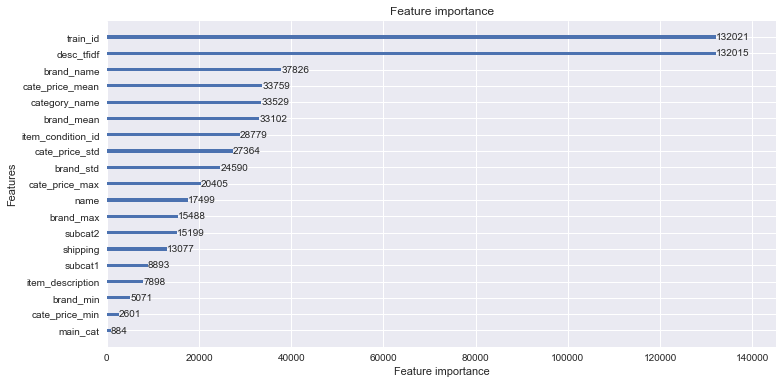

In [93]:
lgb.plot_importance(regg, figsize=(12, 6))
plt.show()

In [97]:
#グリッドサーチ
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate':[0.01, 0.1], 'min_child_samples':[10, 20, 40, 100]}
regg = lgb.LGBMRegressor()

regg_cv =GridSearchCV(regg, parameters, cv = 5)
regg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.1], 'min_child_samples': [10, 20, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [99]:
regg = lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

# trainさせる
regg.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [100]:
y_predict = regg.predict(X_test)
# 0以下の値は0に変換する
y_predict[y_predict<0] = 0

rmsle = np.sqrt(mean_squared_log_error(y_test, y_predict))
print(rmsle)

0.5888175805515115


In [101]:
print(1-rmsle)

0.41118241944848855


In [107]:
# Numpy配列からpandasシリーズへ変換
y_predict = pd.Series(np.exp(y_predict))
 
# テストデータのIDと予測値を連結
submit = pd.concat([y_test, y_predict], axis=1)
 
# カラム名をメルカリの提出指定の名前をつける
submit.columns = ['test_id', 'price']
 
# 提出ファイルとしてCSVへ書き出し
submit.to_csv('submit_rf_base.csv', index=False)
 


# 以下：Product NameをWord2VecでVectorにする
（今回はまだそれを点数につなげられていないが提出する）

In [104]:
import gensim
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline

In [108]:
import numpy as np
import pandas as pd
# BeautifulSoup is used to remove html tags from the text
from bs4 import BeautifulSoup 
import re # For regular expressions

In [105]:
product_name=train['name']
product_name.head()

0     MLB Cincinnati Reds T Shirt Size XL
1                             Trump Shirt
2        Stussy vintage dot Ragland LARGE
3    2-Mens XXL Cruise Ship T-Shirts NWOT
4                           'Garbage" tee
Name: name, dtype: category
Categories (1225273, object): [! 3 girls t shirts, ! 4 old baseball cards, ! ALPINESTAR MEN'S TEE SHIRT!, ! HOLD ! Distressed Jeans/ Shorts Bundle, ..., ️️️️Gray Fleece Lined Legging, （on sale）Xmas gift 2/set buddha keychain, ，Carolina Panthers #88 Greg Olsen jersey, ：）iPhone 6/6s RoseGold Mirror case]

In [109]:
# textをsequence of wordsにconvertする
def review_wordlist(review, remove_stopwords=False):
    # 1. Removing html tags
    review_text = BeautifulSoup(review).get_text()
    # 2. Removing non-letter.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    # 3. Converting to lower case and splitting
    words = review_text.lower().split()
    # 4. Optionally remove stopwords
    if remove_stopwords:
        stops = set(stopwords.words("english"))     
        words = [w for w in words if not w in stops]
    
    return(words)

In [113]:
# word2vec expects a list of lists.
# Using punkt tokenizer for better splitting of a paragraph into sentences.

import nltk.data
#nltk.download('popular')

tokenizer = nltk.data.load('/Users/szkhome/nltk_data/tokenizers/punkt/english.pickle')



In [114]:
# 　Reviewならば文章に分割するやつ
def review_sentences(review, tokenizer, remove_stopwords=False):
    # 1. Using nltk tokenizer
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    # 2. Loop for each sentence
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(review_wordlist(raw_sentence,\
                                            remove_stopwords))

    # This returns the list of lists
    return sentences



In [116]:
sentences = []
print("training setから文章をparseしてます")
for name in train["name"]:
    sentences += review_sentences(name, tokenizer)

training setから文章をparseしてます


/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))
/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You shouldprobably open this file and pass the filehandle intoBeautiful Soup.
  'Beautiful Soup.' % markup)
/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/pyth

In [117]:
# Importing the built-in logging module
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [118]:
num_features = 30  # Word vector dimensionality
min_word_count = 1 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 10        # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words

# Initializing the train model
from gensim.models import word2vec
print("Training 中です....")
model = word2vec.Word2Vec(sentences,\
                          workers=num_workers,\
                          size=num_features,\
                          min_count=min_word_count,\
                          window=context,
                          sample=downsampling)

# To make the model memory efficient
model.init_sims(replace=True)

# Saving the model for later use. Can be loaded using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

2018-10-03 15:16:58,675 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2018-10-03 15:16:58,806 : INFO : collecting all words and their counts
2018-10-03 15:16:58,807 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-10-03 15:16:58,824 : INFO : PROGRESS: at sentence #10000, processed 43663 words, keeping 5246 word types
2018-10-03 15:16:58,840 : INFO : PROGRESS: at sentence #20000, processed 82795 words, keeping 8225 word types
2018-10-03 15:16:58,861 : INFO : PROGRESS: at sentence #30000, processed 121296 words, keeping 9922 word types
2018-10-03 15:16:58,883 : INFO : PROGRESS: at sentence #40000, processed 159357 words, keeping 11933 word types


Training 中です....


2018-10-03 15:16:58,899 : INFO : PROGRESS: at sentence #50000, processed 199256 words, keeping 13813 word types
2018-10-03 15:16:58,918 : INFO : PROGRESS: at sentence #60000, processed 240085 words, keeping 15397 word types
2018-10-03 15:16:58,939 : INFO : PROGRESS: at sentence #70000, processed 279209 words, keeping 16322 word types
2018-10-03 15:16:58,954 : INFO : PROGRESS: at sentence #80000, processed 317343 words, keeping 17557 word types
2018-10-03 15:16:58,971 : INFO : PROGRESS: at sentence #90000, processed 356424 words, keeping 18559 word types
2018-10-03 15:16:58,990 : INFO : PROGRESS: at sentence #100000, processed 396202 words, keeping 19351 word types
2018-10-03 15:16:59,006 : INFO : PROGRESS: at sentence #110000, processed 437096 words, keeping 20210 word types
2018-10-03 15:16:59,022 : INFO : PROGRESS: at sentence #120000, processed 478706 words, keeping 21299 word types
2018-10-03 15:16:59,041 : INFO : PROGRESS: at sentence #130000, processed 521072 words, keeping 22438

2018-10-03 15:17:00,180 : INFO : PROGRESS: at sentence #780000, processed 3192831 words, keeping 67687 word types
2018-10-03 15:17:00,194 : INFO : PROGRESS: at sentence #790000, processed 3229318 words, keeping 67836 word types
2018-10-03 15:17:00,210 : INFO : PROGRESS: at sentence #800000, processed 3273699 words, keeping 68056 word types
2018-10-03 15:17:00,225 : INFO : PROGRESS: at sentence #810000, processed 3316074 words, keeping 68292 word types
2018-10-03 15:17:00,243 : INFO : PROGRESS: at sentence #820000, processed 3358506 words, keeping 68583 word types
2018-10-03 15:17:00,258 : INFO : PROGRESS: at sentence #830000, processed 3399851 words, keeping 68765 word types
2018-10-03 15:17:00,273 : INFO : PROGRESS: at sentence #840000, processed 3443166 words, keeping 69188 word types
2018-10-03 15:17:00,288 : INFO : PROGRESS: at sentence #850000, processed 3484009 words, keeping 69538 word types
2018-10-03 15:17:00,305 : INFO : PROGRESS: at sentence #860000, processed 3527331 words,

2018-10-03 15:17:01,345 : INFO : PROGRESS: at sentence #1500000, processed 6264317 words, keeping 89250 word types
2018-10-03 15:17:01,359 : INFO : PROGRESS: at sentence #1510000, processed 6302818 words, keeping 89900 word types
2018-10-03 15:17:01,377 : INFO : PROGRESS: at sentence #1520000, processed 6343447 words, keeping 90499 word types
2018-10-03 15:17:01,383 : INFO : collected 90760 word types from a corpus of 6357185 raw words and 1523426 sentences
2018-10-03 15:17:01,385 : INFO : Loading a fresh vocabulary
2018-10-03 15:17:03,458 : INFO : min_count=1 retains 90760 unique words (100% of original 90760, drops 0)
2018-10-03 15:17:03,459 : INFO : min_count=1 leaves 6357185 word corpus (100% of original 6357185, drops 0)
2018-10-03 15:17:03,759 : INFO : deleting the raw counts dictionary of 90760 items
2018-10-03 15:17:03,767 : INFO : sample=0.001 downsamples 48 most-common words
2018-10-03 15:17:03,768 : INFO : downsampling leaves estimated 5668799 word corpus (89.2% of prior 635

In [119]:
# テストする: おかしな言葉をこの中からお勧めする 
model.wv.doesnt_match("iphone apple 6 orange".split())

2018-10-03 15:17:30,277 : WARNING : vectors for words {'6'} are not present in the model, ignoring these words


'orange'

In [130]:
#テストする：　似たような言葉をだす
model.wv.most_similar("amazon".split())

[('alexa', 0.9029898047447205),
 ('kodi', 0.8610884547233582),
 ('loaded', 0.8506629467010498),
 ('firestick', 0.8484580516815186),
 ('kindle', 0.8459862470626831),
 ('paperwhite', 0.8220502138137817),
 ('echo', 0.8156774044036865),
 ('fully', 0.8106262683868408),
 ('fi', 0.7984487414360046),
 ('wi', 0.7830096483230591)]

In [131]:
vector = model.wv["amazon"]
word = model.most_similar( [ vector ], [], 1)
print(vector)
print(word)

[-0.34719455  0.14637335 -0.45258108 -0.21541087 -0.09044632 -0.12930778
 -0.23748225  0.13257527 -0.07275877 -0.14488356 -0.28075743  0.10279118
  0.01740548  0.05634356  0.09005193  0.21663907  0.15383804  0.2304457
  0.02385601  0.0388369   0.15831132  0.12690006  0.12754332 -0.33241463
  0.07518264  0.14790499  0.06920319  0.01568015 -0.20939207 -0.10266002]
[('amazon', 1.0)]


/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [134]:
#出力数を変更
vector = model.wv["amazon"]
word = model.most_similar( [ vector ], [], 5)
print(vector)
print(word)

[-0.34719455  0.14637335 -0.45258108 -0.21541087 -0.09044632 -0.12930778
 -0.23748225  0.13257527 -0.07275877 -0.14488356 -0.28075743  0.10279118
  0.01740548  0.05634356  0.09005193  0.21663907  0.15383804  0.2304457
  0.02385601  0.0388369   0.15831132  0.12690006  0.12754332 -0.33241463
  0.07518264  0.14790499  0.06920319  0.01568015 -0.20939207 -0.10266002]
[('amazon', 1.0), ('alexa', 0.9029898047447205), ('kodi', 0.8610884547233582), ('loaded', 0.8506629467010498), ('firestick', 0.8484580516815186)]


/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [135]:
#単語のみを出力
model.most_similar( [ vector ], [], 1)[0][0]

/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


'amazon'

# 残された課題

In [ ]:
#さらに１）商品の価格を文章に取り入れられるようにするアイデアが値段と商品名のにたものを出せると考えたが、未実装
#上記の時点で２）iphone [6]の型番が入っていないことになったのでそこも課題